In [1]:
%load_ext autoreload
%autoreload 2

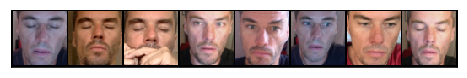

In [2]:
%matplotlib inline
from gaze import init, Data

args = init(batch_size=8, verbose=0)
#args.batch_size=16
d = Data(args)
fig, ax = d.show()

In [ ]:
from gaze import ML

ml = ML(args)
ml.device

device(type='cpu')

## learning the model

In [ ]:
from gaze import ML
ml = ML(args)

import os
path = '_Regard.pt'
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

Loading file _Regard.pt


## running the forward model

In [ ]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [ ]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))

Accuracy=97.3%


In [ ]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

center blink  left  left  left  left  left right


In [ ]:
import matplotlib.pyplot as plt
fig, ax = ml.show(only_wrong=True)
plt.show()

## cross-validation

In [ ]:
args = init(verbose=0, log_interval=0, epochs=20)
from gaze import MetaML
mml = MetaML(args)
Accuracy = mml.protocol(args, 42)
print('Accuracy', Accuracy[:-1].mean(), '+/-', Accuracy[:-1].std())

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=((8, 5)))
n, bins, patches = ax.hist(Accuracy[:-1]*100, bins=np.linspace(0, 100, 100), alpha=.4)
ax.vlines(np.median(Accuracy[:-1])*100, 0, n.max(), 'g', linestyles='dashed', label='median')
ax.vlines(25, 0, n.max(), 'r', linestyles='dashed', label='chance level')
ax.vlines(100, 0, n.max(), 'k', label='max')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Smarts')
ax.legend(loc='best')
plt.show() 
#plt.savefig('accuracy.pdf')